# Visualize a complexheatmap for NF1 morphology features

In [1]:
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(dplyr))

In [2]:
# Set paths and constants
input_data_dir <- file.path("..", "..", "..", "4_processing_features", "data", "Plate2")
output_figure_dir <- "figures/Plate2"

cp_heatmap_file_noext <- file.path(output_figure_dir, "all_cp_complex_heatmap")
dp_heatmap_file_noext <- file.path(output_figure_dir, "dp_complex_heatmap")

In [3]:
# Set heatmap colors
well_cols = c(
    "A1" = '#8e0152',
    "A6" = '#de77ae',
    "A7" = '#f7f7f7',
    "A12" = '#7fbc41',
    "B1" = '#dfc27d',
    "B6" = '#c7eae5',
    "B7" = '#35978f',
    "B12" = '#003c30',
    "C1" = '#9e0142',
    "C6" = "#E1DAAE",
    "C7" = "#FF934F",
    "C12" = '#d53e4f', 
    "D1" = '#f46d43',
    "D6" = "#CC2D35",
    "D7" = "#058ED9",
    "D12" = '#fdae61',
    "E1" = '#fee08b',
    "E6" = "#848FA2",
    "E7" = "#2D3142",
    "E12" = '#ffffbf',
    "F1" = '#e6f598',
    "F6" = "#FFC857",
    "F7" = "#5f7a12",
    "F12" = '#abdda4',
    "G1" = '#66c2a5',
    "G6" = '#3288bd',
    "G7" = '#5e4fa2',
    "G12" = '#d73027',
    "H1" = '#abd9e9',
    "H6" = '#1b7837',
    "H7" = '#762a83',
    "H12" = '#8c510a'
)
genotype_cols = c(
    "Null" = "#785EF0",
    "WT" = "#DC267F"
)

## Create a heatmap for CP features

In [4]:
# Load data
cp_file <- file.path(input_data_dir, "CellProfiler", "nf1_sc_norm_fs_cellprofiler_plate2.csv.gz")

cp_df <- readr::read_csv(
    cp_file,
    col_types = readr::cols(
        .default="d",
        Metadata_WellRow="c",
        Metadata_WellCol="c",
        Metadata_Well="c",
        Metadata_gene_name="c",
        Metadata_genotype="c"
    )
) %>% dplyr::select(-...1)  # Drop index col

print(dim(cp_df))
head(cp_df, 3)

New names:
• `` -> `...1`


[1] 1681  409


Metadata_WellRow,Metadata_WellCol,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,⋯,Nuclei_Texture_InfoMeas2_RFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_01_256,Nuclei_Texture_InfoMeas2_RFP_3_02_256,Nuclei_Texture_InfoMeas2_RFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_DAPI_3_00_256,Nuclei_Texture_InverseDifferenceMoment_GFP_3_01_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_02_256,Nuclei_Texture_SumEntropy_DAPI_3_02_256,Nuclei_Texture_SumVariance_GFP_3_03_256,Nuclei_Texture_SumVariance_RFP_3_03_256
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,1,47,NF1,WT,5,1,A1,1,5,⋯,-0.3642441,1.0942569,0.3210258,-0.4921362,-0.1749996,0.8588423,1.2224128,-0.2422471,-0.5280949,-0.3061008
A,1,47,NF1,WT,5,1,A1,2,6,⋯,0.6314538,-1.7130545,-2.0083868,-1.5012217,-0.1936566,0.8109321,-0.7946245,0.2575297,-0.5084962,-0.3155186
A,1,47,NF1,WT,5,1,A1,3,7,⋯,0.8845512,-0.8758951,-1.0170639,-0.1924248,0.1030227,0.8749615,-0.6578680,-0.3904206,-0.5653799,-0.2230783


In [5]:
# Split metadata and feature data
cp_metadata_df <- cp_df %>% dplyr::select(tidyr::starts_with("Metadata"))
cp_meta_cols <- colnames(cp_metadata_df)
cp_df <- cp_df %>% dplyr::select(-!!cp_meta_cols)

In [6]:
# Calculate correlation matrix from feature data
cp_cor_matrix <- t(cp_df) %>% cor()

print(dim(cp_cor_matrix))
head(cp_cor_matrix, 3)

[1] 1681 1681


1.0000000,0.1353276,0.1730279,0.48482757,0.2593204,0.1231149,0.16649722,0.09682669,0.3434908,0.26855393,⋯,-0.01252058,-0.26768075,0.08954365,-0.06004828,-0.2921224,-0.06292399,-0.08371642,0.03443643,0.07338084,0.1671904
0.1353276,1.0000000,0.2786011,-0.07280074,0.3372423,0.2527398,0.07584546,0.02016453,0.2584642,0.04346383,⋯,-0.16611861,0.01632684,0.25408280,0.20317063,-0.1588916,-0.05024689,-0.02183879,0.18161236,0.11893641,0.3980299
0.1730279,0.2786011,1.0000000,0.06411780,0.4072689,0.2972215,0.02055109,0.14718339,0.3916973,0.07014173,⋯,-0.27871169,-0.05033330,0.06360510,0.08186977,-0.2265108,0.02879762,0.13320444,0.18283315,0.29792487,0.4019014


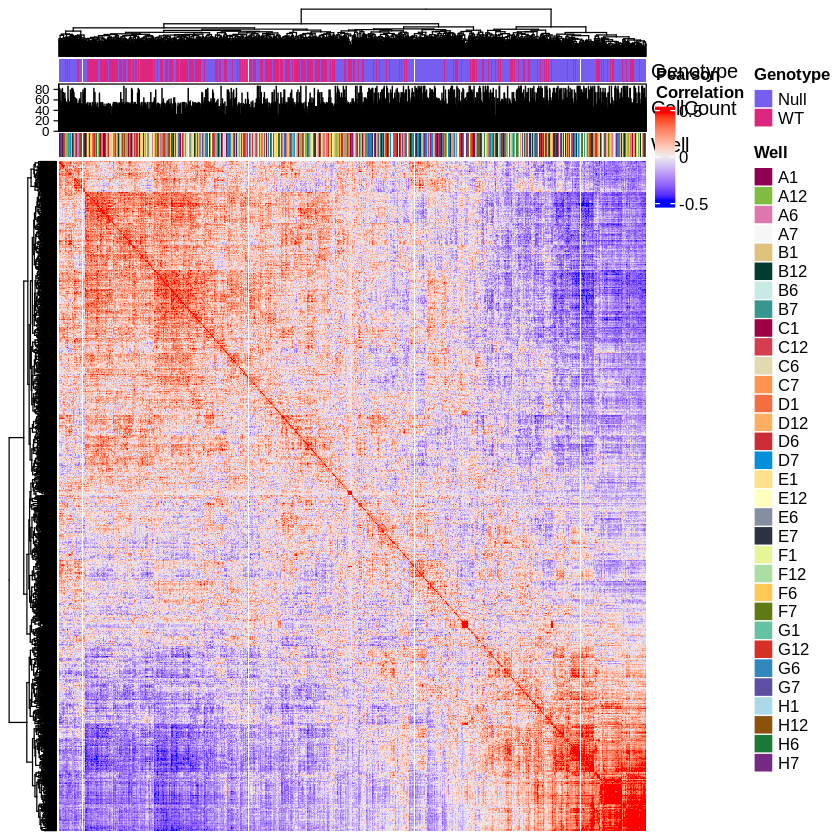

In [7]:
ht <- Heatmap(
    cp_cor_matrix,
    name = "Pearson\nCorrelation",
    column_dend_side = "top",
    
    clustering_method_columns = "average",
    clustering_method_rows = "average",
    
    top_annotation = HeatmapAnnotation(
        Genotype = cp_metadata_df$Metadata_genotype,
        CellCount = anno_barplot(
            cp_metadata_df$Metadata_number_of_singlecells,
            height = unit(1, "cm")
        ),
        Well = cp_metadata_df$Metadata_Well,
        
        col = list(
            Genotype = genotype_cols,
            Well = well_cols
        )
    )
)

draw(ht)

In [ ]:
# Save heatmap to file
pdf(paste0(cp_heatmap_file_noext, ".pdf"))
draw(ht)
dev.off()

png(paste0(cp_heatmap_file_noext, ".png"), width = 6.5, height = 6, units = "in", res = 500)
draw(ht)
dev.off()

## Create a heatmap for DeepProfiler features

In [ ]:
# Load data
dp_file <- file.path(input_data_dir, "DeepProfiler", "nf1_sc_norm_fs_deepprofiler_nuc.csv.gz")

dp_df <- readr::read_csv(
    dp_file,
    col_types = readr::cols(
        .default="d",
        Metadata_Plate="c",
        Metadata_Well="c",
        Metadata_Site="c",
        Metadata_Plate_Map_Name="c",
        Metadata_DNA="c",
        Metadata_ER="c",
        Metadata_Actin="c",
        Metadata_Genotype="c",
        Metadata_Genotype_Replicate="c",
        Metadata_Model="c"
    )
)

print(dim(dp_df))
head(dp_df, 3)

In [ ]:
# Split metadata and feature data
dp_metadata_df <- dp_df %>% dplyr::select(tidyr::starts_with("Metadata"))
dp_meta_cols <- colnames(dp_metadata_df)
dp_meta_cols <- c(dp_meta_cols, c("Location_Center_X", "Location_Center_Y"))

dp_df <- dp_df %>% dplyr::select(-!!dp_meta_cols)

In [ ]:
# Calculate number of single cells per well in DP data
dp_metadata_df <- dp_metadata_df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::add_tally(name = "Metadata_cell_count")

In [ ]:
# Calculate correlation matrix from feature data
dp_cor_matrix <- t(dp_df) %>% cor()

print(dim(dp_cor_matrix))
head(dp_cor_matrix, 3)

In [ ]:
ht <- Heatmap(
    dp_cor_matrix,
    name = "Pearson\nCorrelation",
    column_dend_side = "top",
    
    clustering_method_columns = "average",
    clustering_method_rows = "average",
    
    top_annotation = HeatmapAnnotation(
        Genotype = dp_metadata_df$Metadata_Genotype,
        CellCount = anno_barplot(
            dp_metadata_df$Metadata_cell_count,
            height = unit(1, "cm")
        ),
        Well = dp_metadata_df$Metadata_Well,
        
        col = list(
            Genotype = genotype_cols,
            Well = well_cols
        )
    )
)

draw(ht)

In [ ]:
# Save heatmap to file
pdf(paste0(dp_heatmap_file_noext, ".pdf"))
draw(ht)
dev.off()

png(paste0(dp_heatmap_file_noext, ".png"), width = 6.5, height = 6, units = "in", res = 500)
draw(ht)
dev.off()